<img src="https://upload.wikimedia.org/wikipedia/fr/8/81/Sciences_SU.png" width="600" height="240" align="center"/>

# <!-- TITLE --> Rendu TP Image


### Objectives :

Dans ce TP, nous allons implementer et etudier le fonctionnement (influence des parametres, limitations, variantes)
d’un detecteur et d’un descripteur dans l’optique de realiser une application de panorama.


### Etudiants :

- Nom : SAKR                                                         
- Prénom : Mohamed Walid    


- Nom : NABTI        
- Prenom : Anes   



## 1. Importation des bibliothéques

In [2]:
# importation des bibliothèques
import warnings
import cv2
import sys
from skimage.io import imread
from skimage.transform import rotate
import pathlib
import os
import numpy as np

# Gestion du path
path2 = str(pathlib.Path().parent.resolve())
print(path2)
sys.path.append(path2 + "\\bin")
cible_path = '\pics\P1.jpg'
cible_path2 = '\pics\P2.jpg'
path = path2 + cible_path
PATH2 = path2 + cible_path2

# Importation de la classe 
from points_d_interets import *


D:\M2\Image\TP1\Point_d_interets


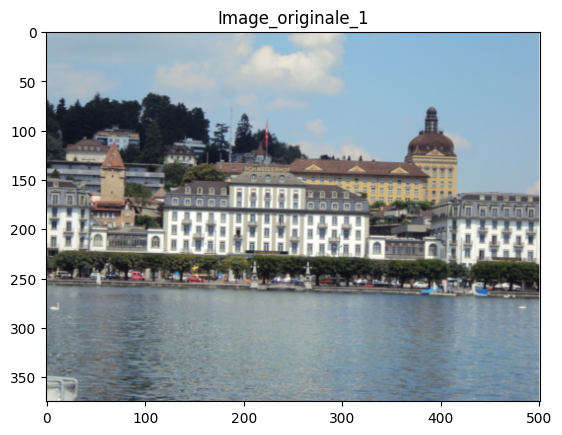

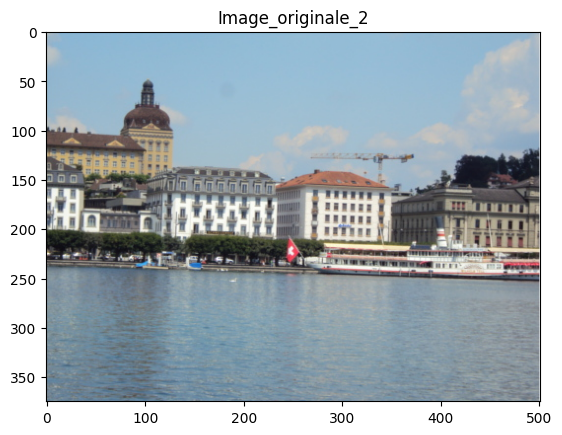

In [3]:
# Lecture de l'image 1 et l'image 2
P1 = imread(path)                        
P2 = imread(PATH2)
# Instanciate the class
PI = Points_d_interets (P1)    
PI_2 = Points_d_interets (P2)        
#Plot des images                            
PI.plot_image(P1, 'Image_originale_1')
PI_2.plot_image(P2, 'Image_originale_2')

## 2. Implémentation

### <u> Exercice 1 : Détectcion de points d'intérêt 

#### 1. Détecteur de Harris : 

Le détecteur de Harris est une méthode qui nous permets de détecter des coin que se définissent par un changement d'intensité dans toutes les directions. Ce qui revient à dire, que le fait de décaler une fenêtre $W$ dans n'importe quelle direction doit entrainer de larges changements d'intensité.

Soit : $$ E(u,v) = \sum\limits _{(x,y)\in W} (I(x + u, y + v) - I(x,y))^2 $$

En appliquant le DL de I(x + u, y + v), et en la remplaçant dans l'équation, on arrive à définir un Critère de Harris : 
                $$ C = det(M) - ktrace(M)^2 $$ 

Avec :    $$ M = \begin{bmatrix} \sum I_x^2 & \sum I_xI_y \\ \sum I_xI_y & \ \sum I_y^2 \end{bmatrix}$$
* $k \in [0;04;0.06]$ 

* **Coin :** C > 0 ==> $ \lambda _1$ = $ \lambda _2$  et $ \lambda _i$ grand
* **Contour :** C < 0 == > $ \lambda _1$ >> $ \lambda _2$ ou $ \lambda _1$ << $ \lambda _2$ 
* **Région homogène :** |C| = 0 ==> $ \lambda _1$ = $ \lambda _2$ = 0    


##### a ) Implémentation de Harris par différent type de fenêtre :

a détection des points d'intérêt par Harris repose principalement du critère C qui dépend de M. Il est important de lisser les dérivées partielles, ce qui revient à : $$ M = g(\sigma) * \begin{bmatrix} I_x^2 &  I_xI_y \\  I_xI_y & \  I_y^2 \end{bmatrix}$$

* La convolution fait apparaître déjà la somme pondérée, d'où son absence dans l'équation

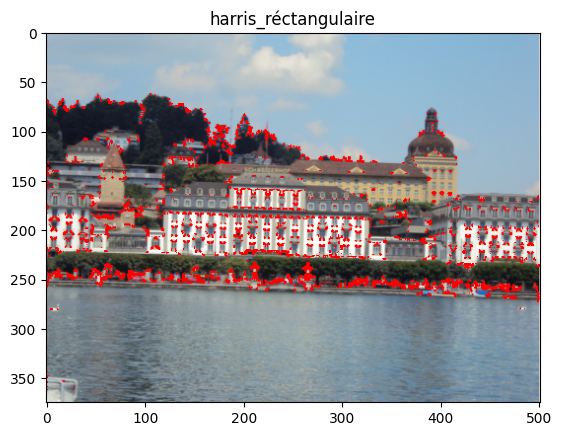

In [4]:
image_harris_rectangle, C1 = PI.harris_detector('réctangle')                             # Harris detector by rectangular window
PI.plot_image(image_harris_rectangle, 'harris_réctangulaire')

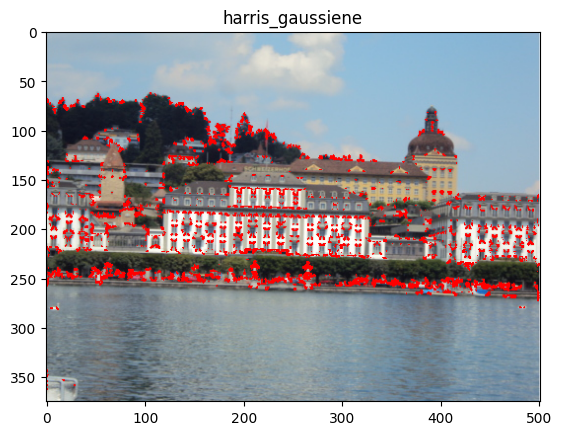

In [5]:
# Harris detector by gaussian window 
image_harris_gauss, C2 = PI.harris_detector('Gaussiène')                         
PI.plot_image(image_harris_gauss, 'harris_gaussiene')

On constate que les deux fenêtres détectent à peu près les mêmes points d'intérêt.

Cependant, la pondération gaussiènne donne plus d'importance aux pixels centraux. 

On verra également dans la suite que cette dernière rend le détecteur invariant à la rotation.

##### b ) Implémentation de la suppression des non-maximas : 

D'après les résultats obtenus on constate qu'il a présence de plusieurs points d'intérêt pour la m^me zone. Or on a vu dans le cours, qu'un point d'intérêt doit être local. 

L'objectif de cette partie est de laisser que les points d'interêt qui sont des maximums dans la matrice de critère C.

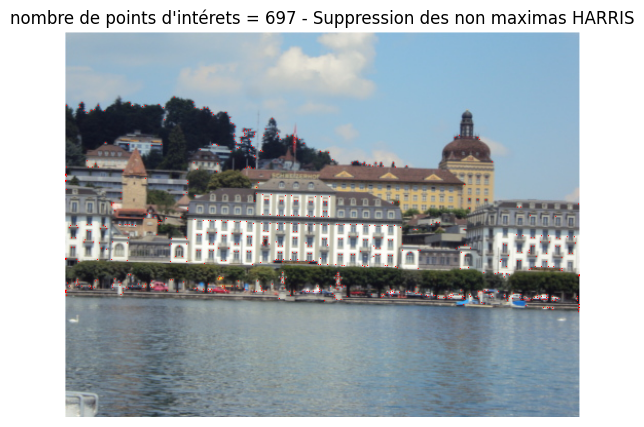

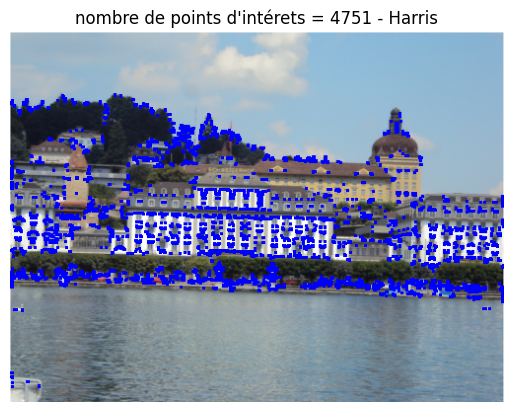

In [6]:
PI.plot_harris_suppression_non_maximas ()


On observe une forte baisse de points d'intérêt détectés après avoir appliquer une suppression des non-maximas. 

On est à 697 points détectés, alors qu'avant on avait 4751 points.

La suppression des non maximas est intéressante car elle permet de vérifier la caractéristique du point d'intérêt qui consiste à dire qu'un point d'intérêt doit être local.

De plus, avec un nombre de points d'intérêt faible (suppression des non-maximas), nous arrivons à réduire le temps de calcul pour faire la description des points d'intérêt afin de réaliser un matching entre deux images pour avoir une Panorama à la fin.


##### c ) Etude de l'influence du type de la taille de la fenêtre de pondération ainsi que le paramètre k : 

* La fonction de pondération gaussiènne donne plus d'importance aux pixels centraux. Elle est plus éfficace que la fonction de pondération réctangulaire. 
* Plus la taille de la fenêtre augmente plus on détecte moiins de points d'intérêt et inversement. 


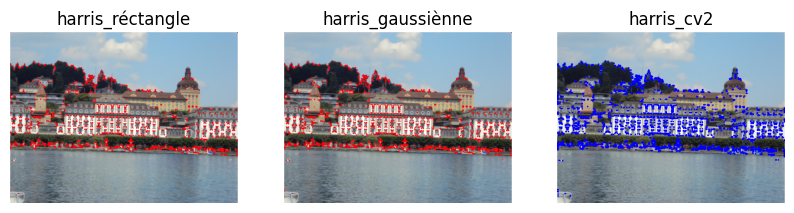

In [7]:
harris_cv2, nbr = PI.harris_by_cv2(0.05)   
PI.compare_methods (image_harris_rectangle, image_harris_gauss, harris_cv2, "harris_réctangle", "harris_gaussiènne", "harris_cv2")

D:\M2\Image\TP1\Point_d_interets\bin\points_d_interets.py:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array((tab_of_figure)) , np.array(number_corners)


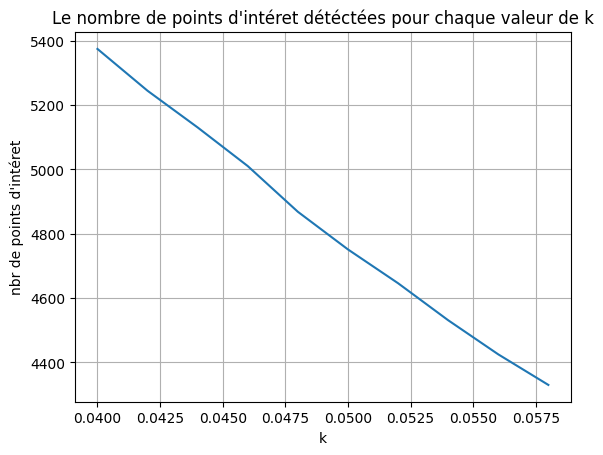

In [8]:
k_values = np.array(np.arange (0.04 , 0.06 , 0.002))
PI.plot_k_impact(k_values)

La figure représente le nombre de points détéctés en fonction de la valeur de k. On remarque que plus k augmente plus le nombre de points d'intérêt diminue. Car  $$ C = det(M) - ktrace(M)^2 $$ 

Et donc si k augmente C diminue, ce qui veut dire qu'on aura moins de points qui vérifient le seuil qu'on applique pour détécter les coins. Et par conséquent, le nombre de points d'intérêts détectées diminuent lorsque k augmente.

Ps : Le nombre de points d'intérets affiché dans la figure est avant application de la suppression des non maximas

##### d) Etude de la rotation : 

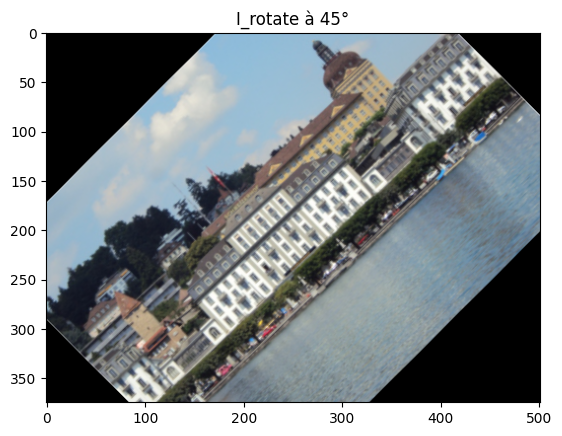

In [9]:
I_rotate = rotate(np.copy(P1), 45)
I_rotate2 = rotate (np.copy(P2),45)
P_rotate = Points_d_interets(I_rotate)
P_rotate2 = Points_d_interets(I_rotate2)
P_rotate.plot_image(I_rotate, "I_rotate à 45°")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


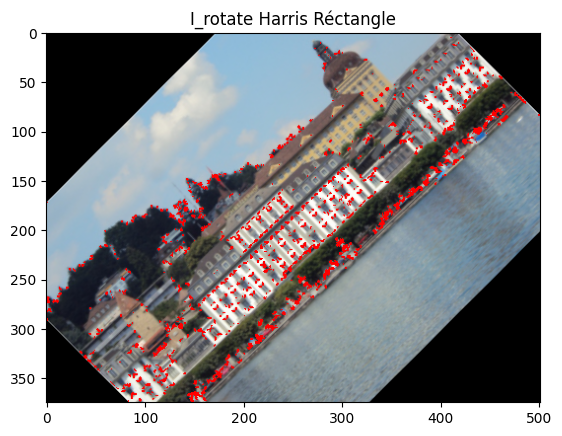

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


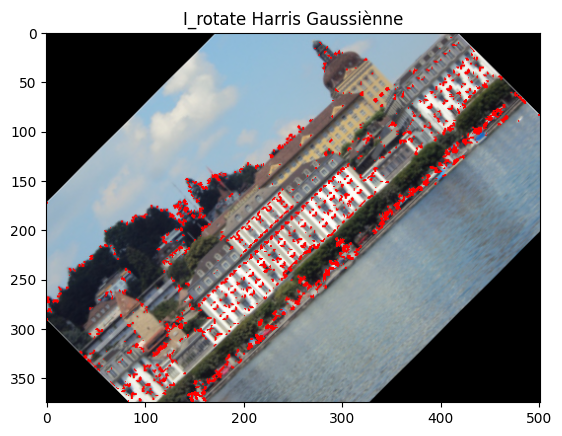

In [10]:
image_harris_rotate, C3 = P_rotate.harris_detector('réctangle')                             # Harris detector by rectangular window
image_harris_gauss_rotate, C4 = P_rotate.harris_detector('Gaussiène')  
P_rotate.plot_image(image_harris_rotate, "I_rotate Harris Réctangle")
P_rotate.plot_image(image_harris_gauss_rotate, "I_rotate Harris Gaussiènne")

La fenêtre de pondération gaussiènne est invariante à la rotation, car une gaussiènne est symétrique, et donne plus d'importance au pixel centraux.

On obtient donc les mêmes points d'intérêt. 

Néanmoins, Harris n'est pas invariant à l'échelle. On peut dans ce cas diviser l'image pour récupérer sa taille initiale (utiliser plusieurs résolutions de l'image), appliquer un sous-échantillonnage plusieurs fois sur l'image pour créer une pyramide ensuite, on effectue la détection sur chaque image. Ou nous pouvons utiliser l'algorithme de **SUSAN** 

#### 2. Détecteur Fast :

Pour chaque pixel $p_0$ de l'image, on va considérer les 16 pixels sur un cercle $C$ de rayon 3 et centré sur $p_0$

$p_0$ est un coin si n pixels consécutifs du cercle ont une intensité supérieure à $I(p_0) + t$ ou inférieure à $I(p_0) - t$

In [11]:
image_fast, Cf = PI.fast_detector( n = 9, t = 30)

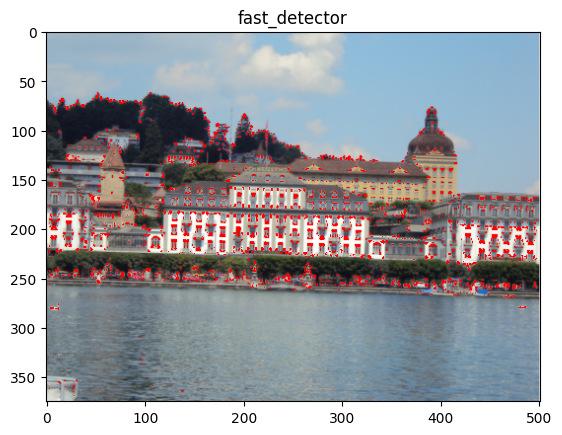

In [12]:
PI.plot_image(image_fast, 'fast_detector')

On remarque que le détecteur Fast est plus rapide que le détecteur de Harris

##### b) Implémentation de la suppression des non maximas : 

C:\Users\walid\AppData\Local\Temp\ipykernel_55060\2197830060.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pid2, img_fast_suppression2, nbr_fast2 = np.array(PI. suppression_of_non_maximas_fast (Cf))


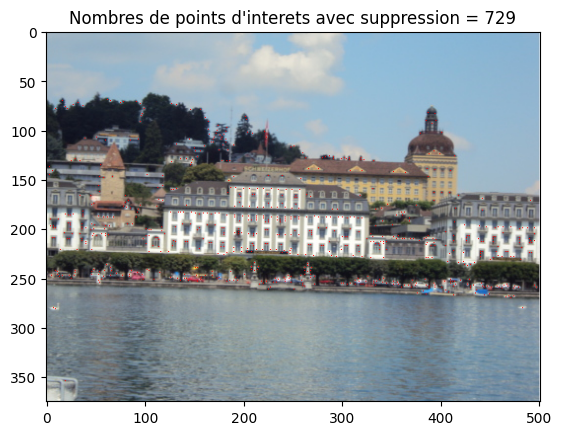

In [13]:
pid2, img_fast_suppression2, nbr_fast2 = np.array(PI. suppression_of_non_maximas_fast (Cf))
PI.plot_image (img_fast_suppression2, f"Nombres de points d'interets avec suppression = {nbr_fast2}")


##### c) Etude de la rotation : 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


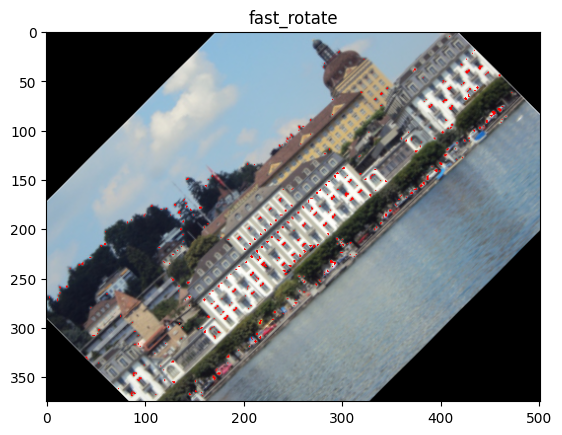

In [14]:
image_fast_rotate, Cff = P_rotate.fast_detector()
PI.plot_image(image_fast_rotate, "fast_rotate")      

On constate que FAST est invariant à la rotation

Ce qui est logique etant données que FAST ne compare que l'intensité du pixel considerer avec ses 16 voisins, et si on fait une rotations du pixel de $θ$ ses voisins seront aussi affecter par une rotaion d'angle $θ$ et cela sans modifier l'intensité.

#### 3. Comparaison : 

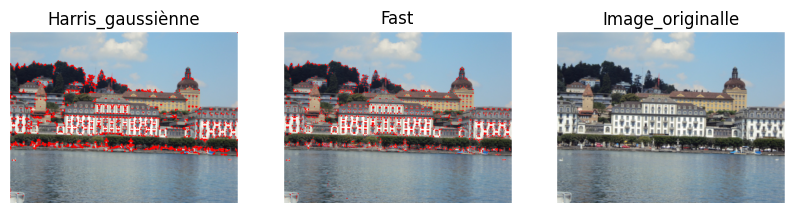

In [15]:
PI.compare_methods(image_harris_gauss, image_fast, P1, "Harris_gaussiènne", "Fast", "Image_originalle")

On constate que les détecteur FAST et Harris permettent de détecter les points d'intérêt. FAST est plus rapide que HARRIS.   

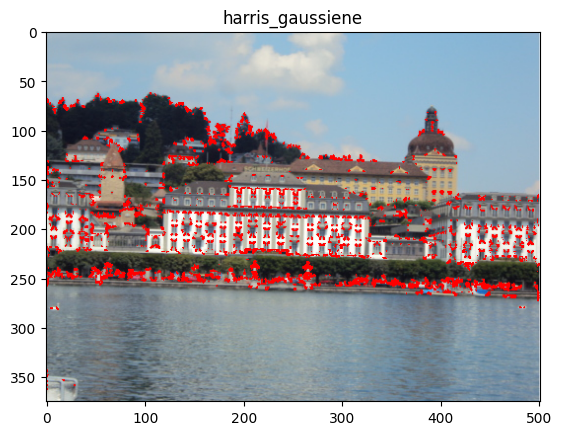

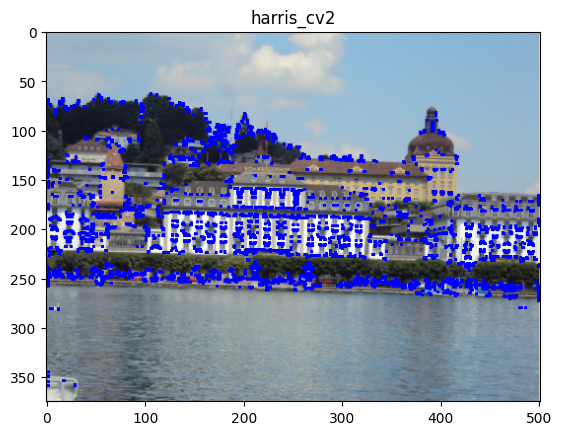

In [16]:
PI.plot_image(image_harris_gauss, 'harris_gaussiene')
PI.plot_image(harris_cv2, 'harris_cv2')

On remarque que Harris que nous avons implémenté ressemble beaucoup au détecteur Harris de CV2. 

La différence est dans le nombre de points détectées, celà est dû au seuil que nous avons fixé dans le code

Comparaison entre fast et fast de cv2

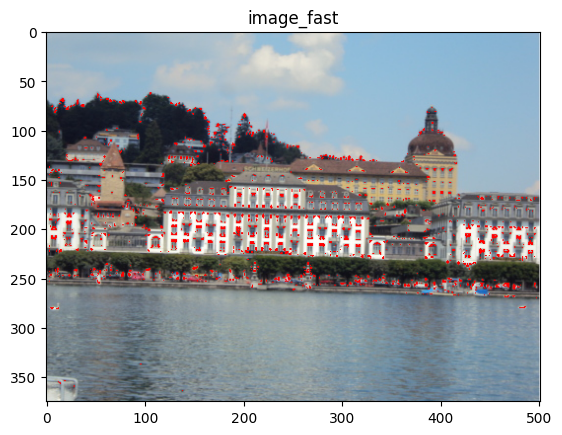

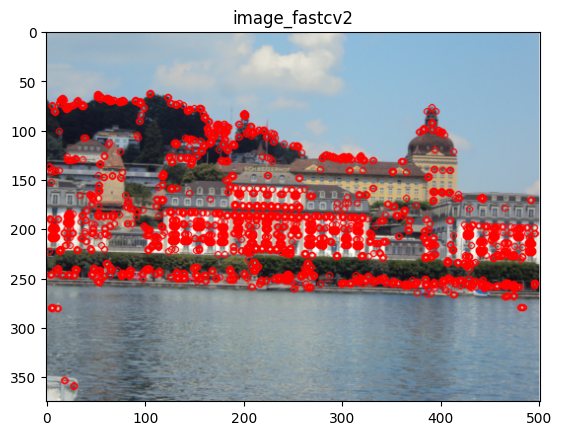

In [17]:
image_fastcv2 , nbr = PI.cv2_fast_detector()
image_fast, Cf = PI.fast_detector(n = 9, t = 40)
PI.plot_image(image_fast, 'image_fast')
PI.plot_image(image_fastcv2, 'image_fastcv2')

On remarque que FAST que nous avons implémenté ressemble beaucoup au détecteur FAST de CV2. 

La différence est dans le nombre de points détectées, celà est dû au seuil que nous avons fixé dans le code

### <u> Exercice 2 : Descriptions et matchings des points d'intérêt 

Après avoir détectées ces points d'intérêt, nous passons maintenant à la description de ces derniers afin de réaliser un matching

#### 1. Descripteur simple : 

L'idée du descripteur est de récupérer pour chaque point d'intérêt un bloc de pixel autour et de le transformer en vécteur. 

Nous obtenons donc une matrice où chaque colonne représente un bloc du points d'intérêt. 

Nous appliquons le même principe pour la deuxième image afin d'avoir le descripteur 2. 

L'idée ensuite est de calculer pour chaque point d'intérêt la distance entre le descripteur 1 et 2, ensuite de prendre les deux meilleurs distance (minimale) est de calculer le rapport $\frac{d_1}{d_2}$. 

Si $\frac{d_1}{d_2}$ < s les deux points se matchent et donc vont nous servir pour le calcul de l'Homographie afin de réaliser une panorama. 

Il existe aussi une autre méthode qui consiste à faire un apparaiment croisé, mais nous avons opté pour la méthode des comparaaison des distances. 

In [18]:
# récupération des descripteur 
n = 3    # la taille du bloc autour du point d'intérêt
descriptor = PI.simple_descriptor (n) 
descriptor2 = PI_2.simple_descriptor(n)

In [19]:
pid_cord2, img_fast_suppression, nbr_fast = np.array(PI_2. suppression_of_non_maximas_fast (PI_2.fast_detector()[1]))   # récupération des coordonées des keypoints de l'image 2
points_of_matching = PI.matching_blocs(descriptor, descriptor2, pid_cord2)            # Réalisation du matching par comparaison des distances

C:\Users\walid\AppData\Local\Temp\ipykernel_55060\4260544368.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pid_cord2, img_fast_suppression, nbr_fast = np.array(PI_2. suppression_of_non_maximas_fast (PI_2.fast_detector()[1]))   # récupération des coordonées des keypoints de l'image 2


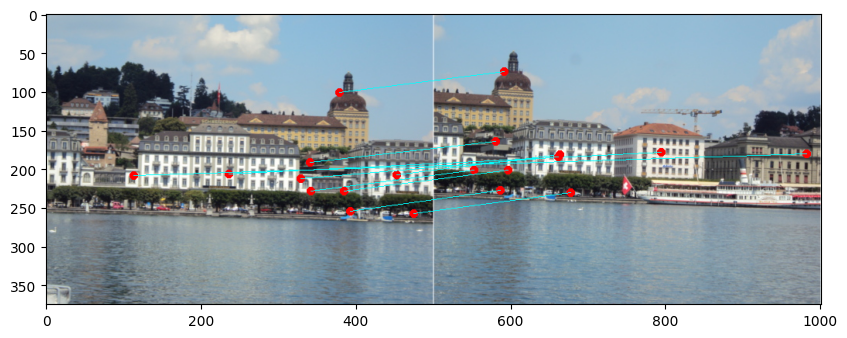

In [20]:
PI.plot_bloc_matching(P2,descriptor, descriptor2, pid_cord2)     # affichage du matching

* Plus la taille n du bloc augmente, moins on détecte de points d'intérêt (si n augmente ==> le nombre de keypoints diminue)
* L'effet de la distance n'a pas beaucoup d'effet, nous avons décidé de chosir la norme L2 ou la distance euclidienne

C:\Users\walid\AppData\Local\Temp\ipykernel_55060\1397308499.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pid_cord2, img_fast_suppression, nbr_fast = np.array(P_rotate2. suppression_of_non_maximas_fast (P_rotate2.fast_detector()[1]))   # récupération des coordonées des keypoints de l'image 2
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


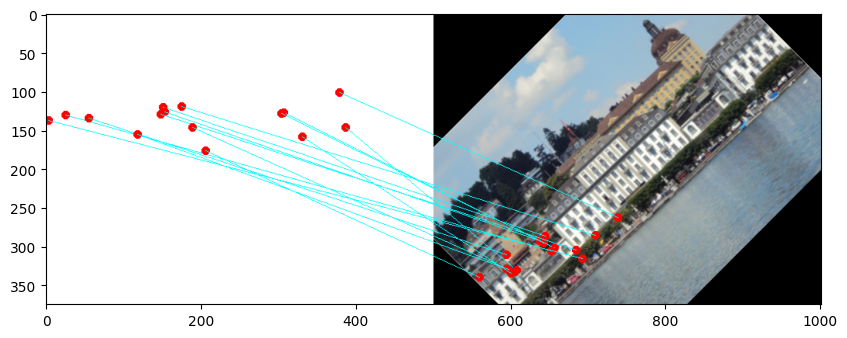

In [21]:
# récupération des descripteur 
n = 3    # la taille du bloc autour du point d'intérêt
descriptor = P_rotate.simple_descriptor (n) 
descriptor2 = P_rotate2.simple_descriptor(n)
pid_cord2, img_fast_suppression, nbr_fast = np.array(P_rotate2. suppression_of_non_maximas_fast (P_rotate2.fast_detector()[1]))   # récupération des coordonées des keypoints de l'image 2
points_of_matching = P_rotate.matching_blocs(descriptor, descriptor2, pid_cord2) 
PI.plot_bloc_matching(I_rotate,descriptor, descriptor2, pid_cord2)     # affichage du matching       

Malheureusement, ces descripteur ne sont pas invariants à la rotation, ce qui fait qu'on aura pas toujours le même bloc de pixels autour. 

Par conséquent, l'idée est d'implémenter une solution qui prend en compte orientation principale autour du point d'intérêt 

* Nous commençons par calculer l'orientation du gradient pour tous les pixels autour d'une fenêtre circulaire autour du keypoints p0

* On calcule l'histogramme des gradients : 
$$ HoG_i (p_0) = \sum \limits _{p\in W (p_0)} || \Lambda I(p) || si \theta (p) \in [ih; (i+1)h[ $$
avec $ i \in [0;n_b] $ 

* Enfin, nous passons à l'extraction de l'orientation principale (argmax) 

### <u> Exercice 3 : PANORAMA  

L’algorithme d’assemblage de panorama peut être divisé en quatre étapes fondamentales de base. Ces étapes sont les suivantes :

- Détection de points clés de l'image (Harris ou FAST) et extraction de descripteurs invariants locaux à partir des images d’entrée.
- Recherche de descripteurs correspondants entre les images d’entrée.
- Calcul de la matrice d’homographie.
- La matrice d’homographie est ensuite appliquée à l’image pour envelopper et ajuster ces images et les fusionner en une seule.

Dans cette partie l’objectif est d’implémenter une méthode qui nous permet d’établir 
des correspondances entre des images. 

La transformation qui nous permet de faire cela est appelé l’homographie. 
Un exemple concret des réalisations faites par cette méthode est le panorama. 

Etant donné que nous travaillons avec des coordonnées homogènes implique que notre 
matrice d’homographie est définie à un facteur prés, ce qui implique qu’elle a 8 
inconnues. 

Avant d’estimer notre matrice de transformation notée H, on doit d’abord trouver les 
couples de points (ms,mt) tel que : 

$ms = \begin{pmatrix}
   xs  \\
   ys 
\end{pmatrix}$ point de l'image source

$mt = \begin{pmatrix}
   xt  \\
   yt 
\end{pmatrix}$  point de l'image à raccorder

Chaque couple (ms, mt) donne deux équations et étant donné que nous avons huit 
inconnues il nous faut au minimum quatre couples pour trouver H.

Pour un couple de point nous avons : 

$\begin{pmatrix}
   𝑥𝑠 &𝑦𝑠& 1& 0& 0& 0& −𝑥𝑑. 𝑥𝑠& −𝑥𝑑. 𝑦𝑠& −𝑥𝑑\\
   0& 0& 0& 𝑥𝑠& 𝑦𝑠& 1& −𝑦𝑑. 𝑥𝑠& −𝑦𝑑. 𝑦𝑠& −𝑦𝑑
\end{pmatrix} 
\begin{bmatrix}
   h11  \\
   h12  \\
   h13  \\
   h21  \\
   h22  \\
   h23  \\
   h31  \\
   h32  \\
   h33  \\
\end{bmatrix} = 
\begin{bmatrix}
   0  \\
   0
\end{bmatrix}$


On combine les equations afin d’avoir autant d’equation que d’inconnus, Ce qui revient à résoudre une équation du type : $AH = 0$ tel que H représente le noyau de A.

Une des méthodes de résolution est d’appliquer la SVD sur A tel que $([U S V] = SVD(A))$, c’est-à-dire qu’on décompose A en valeurs singulières. Donc la solution de cette équation est 
contenue dans la dernière colonne de V.

Après avoir tester l'homographie trouvé on remarques que l'images est deformée.

Pour une meilleure estimation par SVD
 nous avons normalisé notre matrice A tel que : 
- Les points sont translatés tel que leur centroïde est à l’origine. 
- Les points sont mis à l’échelle de manière à ce que la distance moyenne par rapport à 
l’origine est égale à √2. 
- La transformation est appliquée pour chaque image indépendamment. 
On recalcule la matrice A avec les points normalisés et on retrouve notre homographie 
H. 

Le but de normaliser les points des images est de minimiser les erreurs.

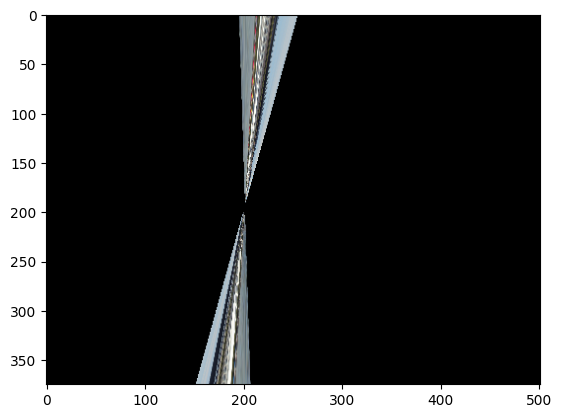

In [27]:
points_of_matching, p1, p2 = PI.matching_blocs(descriptor, descriptor2, pid2)
h1 = PI.find_homography(p1,p2)
#print("Homography", h1)
im_out = cv2.warpPerspective(P1, h1, (P2.shape[1],P2.shape[0]))
plt.imshow(im_out)
plt.show()

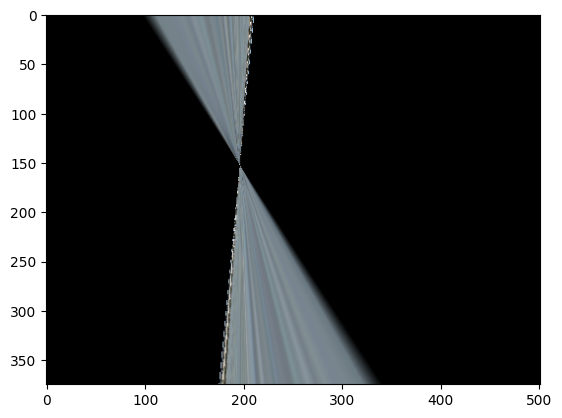

In [44]:
h, status = cv2.findHomography(p1, p2, cv2.RANSAC, 7.0)
im_out = cv2.warpPerspective(P1, h, (P2.shape[1],P2.shape[0]))
plt.imshow(im_out)
plt.show()

Malheureusement on constate que l'image n'a pas pu etre transformer correctement pour pouvoir faire le panorama et ce même avec le calcul de l'homographie avec cv2, cela peut s'expliquer pour différentes raisons : 

- La mèthode de description et de matchbloc peut présenter quelques outliers.
- Pour réduire l'erreur sur l'homographie il faut la normalisée.

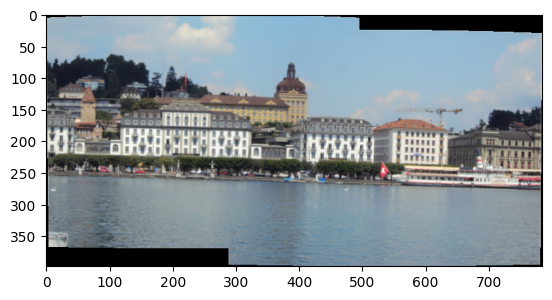

In [24]:
PI.panorama(P2)